In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
prompted = pd.read_csv("prompting.csv")
structured = pd.read_csv("structured.csv")

In [ ]:
# Baseline regular (as prop) vs baseline mini (as opp)
prompted["prop_1_score"][1], prompted["opp_1_score"][2]

(np.int64(77), np.int64(78))

In [ ]:
prompted["opp_1_speech"][1]

"The motion to strip politicians of their privacy rights is an overreach that jeopardizes democratic principles and the functionality of our political systems. It’s a proposal that, although seemingly intent on fostering transparency, risks creating an unworkable environment for public service, diminishing diversity in representation, and leading to an atmosphere of political voyeurism harmful to both politicians and democracy itself. \n\nOur stance is clear: we defend the current level of privacy protection afforded to politicians; however, we advocate for improved oversight mechanisms and transparency measures that specifically target areas prone to corruption, rather than a blanket removal of privacy rights.\n\nFirst, let's dismantle the notion that reducing privacy rights is synonymous with improved accountability and reduced corruption. The Proposition assumes a simplistic one-size-fits-all solution to complex problems. While accountability is paramount, the existing structures—su

In [ ]:
prompted["prop_2_score"]

,prop_2_score
0,74
1,75
2,75
3,74
4,79
5,79
6,79
7,80
8,77
9,80


In [ ]:
prompted

,motion,num_turns,prop_model,opp_model,judge_model,prop_architecture,opp_architecture,winner,reason_for_decision,prop_total_score,...,prop_2_score,opp_2_score,prop_3_score,opp_3_score,prop_1_speech,opp_1_speech,prop_2_speech,opp_2_speech,prop_3_speech,opp_3_speech
0,This house would ban zoos,3,gpt-4o,gpt-4o,o3,enhanced,baseline,Opposition,1. Argumentation & Analysis – Animal-welfare ...,224,...,74,76,72,74,Zoos have long been considered places of educa...,The proposition has painted a dire picture of ...,The opposition has provided a spirited defense...,The proposition continues to argue that bannin...,The core of today's debate centers around our ...,The proposition has consistently argued for th...
1,This house would remove the right to privacy f...,3,gpt-4o,gpt-4o,o3,baseline,enhanced,Opposition,1. Argumentation & Analysis – Proposition pla...,226,...,75,77,74,75,The motion before us today posits that this ho...,The motion to strip politicians of their priva...,The Opposition's arguments reflect an alarming...,The Proposition has built a seemingly robust c...,The Opposition has consistently misrepresented...,The Opposition stands resolute in showing why ...
2,This house would remove the right to privacy f...,3,gpt-4o-mini,gpt-4o-mini,o3,enhanced,baseline,Opposition,1. Core Clash – Accountability vs. Governance...,224,...,75,78,73,77,Politicians wield immense power. Their decisio...,The proposition has framed the motion as a mea...,The debate around removing the right to privac...,In this debate on whether to remove the right ...,"In this debate, we've explored the critical qu...",This debate on removing the right to privacy f...
3,This house would remove the right to privacy f...,3,gpt-4o-mini,gpt-4o-mini,o3,baseline,enhanced,Opposition,1. Argumentation & Analysis • Prop’s central ...,224,...,74,77,73,78,This house would remove the right to privacy f...,The motion to remove the right to privacy for ...,The motion we are discussing today is one that...,"As we engage in this critical debate, it’s ess...",The heart of this debate centers around the ne...,The debate on the motion to remove the right t...
4,This house would make voting mandatory,3,gpt-4o,gpt-4o,o3,baseline,enhanced,Opposition,1. Argumentation & Analysis • Proposition cle...,230,...,79,78,74,76,"The motion before us is ""This house would make...",The proposition's vision of mandatory voting i...,The Opposition's stance challenges the core of...,The proposition's insistence on mandatory voti...,The debate on mandatory voting has illuminated...,The proposition's unwavering belief in mandato...
5,This house would make voting mandatory,3,gpt-4o-mini,gpt-4o-mini,o3,enhanced,baseline,Proposition,1. Central Clash – Representation & Equality ...,228,...,79,74,72,71,A functioning democracy relies on the active p...,"Mandatory voting, while well-intentioned, pose...",Mandatory voting stands as a necessary and pro...,"Mandatory voting, despite its advocates' claim...",The debate on mandatory voting has brought for...,The debate on mandatory voting has highlighted...
6,This house would make voting mandatory,3,gpt-4o-mini,gpt-4o-mini,o3,baseline,enhanced,Proposition,1. Argumentation & Analysis – Proposition est...,235,...,79,74,78,74,"The motion before us today is: ""This house wou...",The Proposition’s call for mandatory voting pr...,The debate on mandatory voting invokes passion...,The Proposition presents mandatory voting as a...,The debate surrounding mandatory voting has de...,The debate surrounding mandatory voting has un...
7,This house believes that the emphasis on hard ...,3,gpt-4o,gpt-4o,o3,enhanced,baseline,Proposition,1. Argumentation & Analysis • Mental-health h...,236,...,80,74,78,73,The relentless glorification of hard work and ...,The proposition argues that hard work and hust...,The Opposition presents a perspective that hus...,The Proposition's portrayal of hustle culture ...,"In this debate, we have critically examined th...","In this debate, the central is

# Prompted

In [ ]:
# Averages for gpt-4o enhanced
enhanced = [[], [], []]
# Averages for gpt-4o baseline
baseline = [[], [], []]

enhanced_mini = [[], [], []]
baseline_mini = [[], [], []]

enhanced_win_count = 0
baseline_win_count = 0
enhanced_mini_win_count = 0
baseline_mini_win_count = 0

In [ ]:
for index, row in prompted.iterrows():
  if row["prop_architecture"] == "enhanced":
    if row["prop_model"] == "gpt-4o":
      enhanced[0].append(row["prop_1_score"])
      enhanced[1].append(row["prop_2_score"])
      enhanced[2].append(row["prop_3_score"])
      baseline[0].append(row["opp_1_score"])
      baseline[1].append(row["opp_2_score"])
      baseline[2].append(row["opp_3_score"])
      if row["winner"] == "Proposition":
        enhanced_win_count += 1
      if row["winner"] == "Opposition":
        baseline_win_count += 1
    if row["prop_model"] == "gpt-4o-mini":
      enhanced_mini[0].append(row["prop_1_score"])
      enhanced_mini[1].append(row["prop_2_score"])
      enhanced_mini[2].append(row["prop_3_score"])
      baseline_mini[0].append(row["opp_1_score"])
      baseline_mini[1].append(row["opp_2_score"])
      baseline_mini[2].append(row["opp_3_score"])
      if row["winner"] == "Proposition":
        enhanced_mini_win_count += 1
      if row["winner"] == "Opposition":
        baseline_mini_win_count += 1
  if row["prop_architecture"] == "baseline":
    if row["prop_model"] == "gpt-4o":
      baseline[0].append(row["prop_1_score"])
      baseline[1].append(row["prop_2_score"])
      baseline[2].append(row["prop_3_score"])
      enhanced[0].append(row["opp_1_score"])
      enhanced[1].append(row["opp_2_score"])
      enhanced[2].append(row["opp_3_score"])
      if row["winner"] == "Proposition":
        baseline_win_count += 1
      if row["winner"] == "Opposition":
        enhanced_win_count += 1
    if row["prop_model"] == "gpt-4o-mini":
      baseline_mini[0].append(row["prop_1_score"])
      baseline_mini[1].append(row["prop_2_score"])
      baseline_mini[2].append(row["prop_3_score"])
      enhanced_mini[0].append(row["opp_1_score"])
      enhanced_mini[1].append(row["opp_2_score"])
      enhanced_mini[2].append(row["opp_3_score"])
      if row["winner"] == "Proposition":
        baseline_mini_win_count += 1
      if row["winner"] == "Opposition":
        enhanced_mini_win_count += 1


In [ ]:
# Calculate averages
enhanced_avg = [sum(turn)/len(turn) for turn in enhanced]
baseline_avg = [sum(turn)/len(turn) for turn in baseline]
enhanced_mini_avg = [sum(turn)/len(turn) for turn in enhanced_mini]
baseline_mini_avg = [sum(turn)/len(turn) for turn in baseline_mini]

enhanced_avg_avg = sum(enhanced_avg)/len(enhanced_avg)
baseline_avg_avg = sum(baseline_avg)/len(baseline_avg)
enhanced_mini_avg_avg = sum(enhanced_mini_avg)/len(enhanced_mini_avg)
baseline_mini_avg_avg = sum(baseline_mini_avg)/len(baseline_mini_avg)

enhanced_avg.append(enhanced_avg_avg)
baseline_avg.append(baseline_avg_avg)
enhanced_mini_avg.append(enhanced_mini_avg_avg)
baseline_mini_avg.append(baseline_mini_avg_avg)

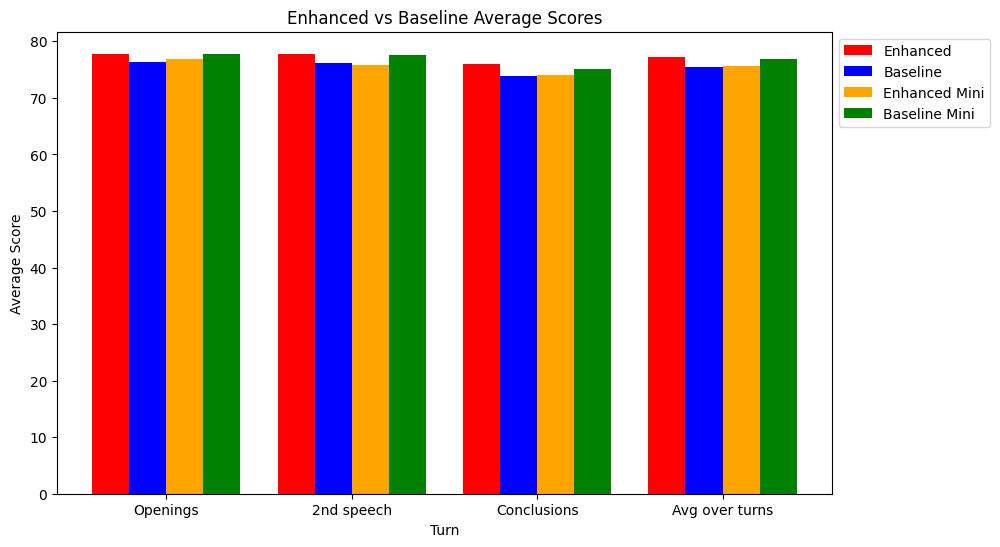

In [ ]:
# Calculate averages
enhanced_avg = [sum(turn)/len(turn) for turn in enhanced]
baseline_avg = [sum(turn)/len(turn) for turn in baseline]
enhanced_mini_avg = [sum(turn)/len(turn) for turn in enhanced_mini]
baseline_mini_avg = [sum(turn)/len(turn) for turn in baseline_mini]

enhanced_avg_avg = sum(enhanced_avg)/len(enhanced_avg)
baseline_avg_avg = sum(baseline_avg)/len(baseline_avg)
enhanced_mini_avg_avg = sum(enhanced_mini_avg)/len(enhanced_mini_avg)
baseline_mini_avg_avg = sum(baseline_mini_avg)/len(baseline_mini_avg)

enhanced_avg.append(enhanced_avg_avg)
baseline_avg.append(baseline_avg_avg)
enhanced_mini_avg.append(enhanced_mini_avg_avg)
baseline_mini_avg.append(baseline_mini_avg_avg)

# Plot
turns = ['Openings', '2nd speech', 'Conclusions', 'Avg over turns']
x = [0, 1, 2, 3]

plt.figure(figsize=(10, 6))

# Adjust spacing - use 0.2 width and proper offsets for 4 bars
bar_width = 0.2
plt.bar([i - 0.3 for i in x], enhanced_avg, width=bar_width, color='red', label='Enhanced')
plt.bar([i - 0.1 for i in x], baseline_avg, width=bar_width, color='blue', label='Baseline')
plt.bar([i + 0.1 for i in x], enhanced_mini_avg, width=bar_width, color='orange', label='Enhanced Mini')
plt.bar([i + 0.3 for i in x], baseline_mini_avg, width=bar_width, color='green', label='Baseline Mini')

plt.xlabel('Turn')
plt.ylabel('Average Score')
plt.title('Enhanced vs Baseline Average Scores')
plt.xticks(x, turns)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
enhanced_avg, baseline_avg, enhanced_mini_avg, baseline_mini_avg

([77.8, 77.8, 76.0, 77.2],
 [76.4, 76.2, 73.8, 75.46666666666667],
 [76.875, 75.875, 74.0, 75.58333333333333],
 [77.75, 77.5, 75.125, 76.79166666666667])

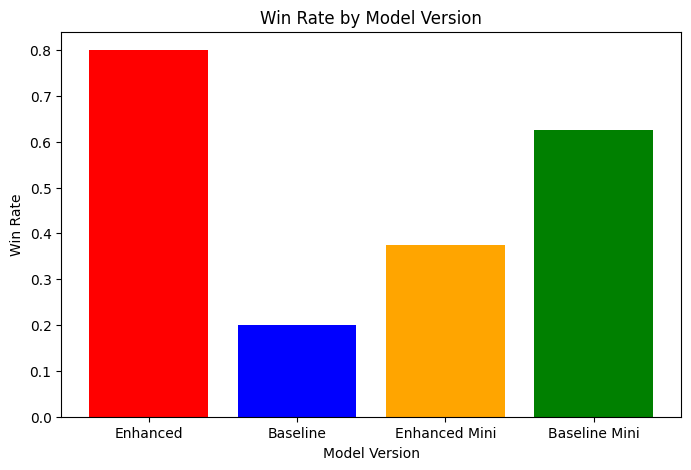

In [ ]:
# Your win count data (replace with your actual data)
categories = ['Enhanced', 'Baseline', 'Enhanced Mini', 'Baseline Mini']

num_reg = enhanced_win_count + baseline_win_count
num_mini = enhanced_mini_win_count + baseline_mini_win_count
win_rates = [enhanced_win_count/num_reg, baseline_win_count/num_reg,
              enhanced_mini_win_count/num_mini, baseline_mini_win_count/num_mini]

# Colors for each bar
colors = ['red', 'blue', 'orange', 'green']

# Create the bar chart
bars = plt.bar(categories, win_rates, color=colors)

plt.xlabel('Model Version')
plt.ylabel('Win Rate')
plt.title('Win Rate by Model Version')

plt.show()

In [ ]:
win_rates

[0.8, 0.2, 0.375, 0.625]

# Architecture

In [ ]:
# Averages for gpt-4o enhanced
enhanced_s = [[], [], []]
# Averages for gpt-4o baseline
baseline_s = [[], [], []]

enhanced_mini_s = [[], [], []]
baseline_mini_s = [[], [], []]

enhanced_win_count_s = 0
baseline_win_count_s = 0
enhanced_mini_win_count_s = 0
baseline_mini_win_count_s = 0

In [ ]:
for index, row in structured.iterrows():
  if row["prop_architecture"] == "enhanced":
    if row["prop_model"] == "gpt-4o":
      enhanced_s[0].append(row["prop_1_score"])
      enhanced_s[1].append(row["prop_2_score"])
      enhanced_s[2].append(row["prop_3_score"])
      baseline_s[0].append(row["opp_1_score"])
      baseline_s[1].append(row["opp_2_score"])
      baseline_s[2].append(row["opp_3_score"])
      if row["winner"] == "Proposition":
        enhanced_win_count_s += 1
      if row["winner"] == "Opposition":
        baseline_win_count_s += 1
    if row["prop_model"] == "gpt-4o-mini":
      enhanced_mini_s[0].append(row["prop_1_score"])
      enhanced_mini_s[1].append(row["prop_2_score"])
      enhanced_mini_s[2].append(row["prop_3_score"])
      baseline_mini_s[0].append(row["opp_1_score"])
      baseline_mini_s[1].append(row["opp_2_score"])
      baseline_mini_s[2].append(row["opp_3_score"])
      if row["winner"] == "Proposition":
        enhanced_mini_win_count_s += 1
      if row["winner"] == "Opposition":
        baseline_mini_win_count_s += 1
  if row["prop_architecture"] == "baseline":
    if row["prop_model"] == "gpt-4o":
      baseline_s[0].append(row["prop_1_score"])
      baseline_s[1].append(row["prop_2_score"])
      baseline_s[2].append(row["prop_3_score"])
      enhanced_s[0].append(row["opp_1_score"])
      enhanced_s[1].append(row["opp_2_score"])
      enhanced_s[2].append(row["opp_3_score"])
      if row["winner"] == "Proposition":
        baseline_win_count_s += 1
      if row["winner"] == "Opposition":
        enhanced_win_count_s += 1
    if row["prop_model"] == "gpt-4o-mini":
      baseline_mini_s[0].append(row["prop_1_score"])
      baseline_mini_s[1].append(row["prop_2_score"])
      baseline_mini_s[2].append(row["prop_3_score"])
      enhanced_mini_s[0].append(row["opp_1_score"])
      enhanced_mini_s[1].append(row["opp_2_score"])
      enhanced_mini_s[2].append(row["opp_3_score"])
      if row["winner"] == "Proposition":
        baseline_mini_win_count_s += 1
      if row["winner"] == "Opposition":
        enhanced_mini_win_count_s += 1


In [ ]:
# Calculate averages
enhanced_avg_s = [sum(turn)/len(turn) for turn in enhanced_s]
baseline_avg_s = [sum(turn)/len(turn) for turn in baseline_s]
enhanced_mini_avg_s = [sum(turn)/len(turn) for turn in enhanced_mini_s]
baseline_mini_avg_s = [sum(turn)/len(turn) for turn in baseline_mini_s]

enhanced_avg_avg = sum(enhanced_avg_s)/len(enhanced_avg_s)
baseline_avg_avg = sum(baseline_avg_s)/len(baseline_avg_s)
enhanced_mini_avg_avg = sum(enhanced_mini_avg_s)/len(enhanced_mini_avg_s)
baseline_mini_avg_avg = sum(baseline_mini_avg_s)/len(baseline_mini_avg_s)

enhanced_avg_s.append(enhanced_avg_avg)
baseline_avg_s.append(baseline_avg_avg)
enhanced_mini_avg_s.append(enhanced_mini_avg_avg)
baseline_mini_avg_s.append(baseline_mini_avg_avg)

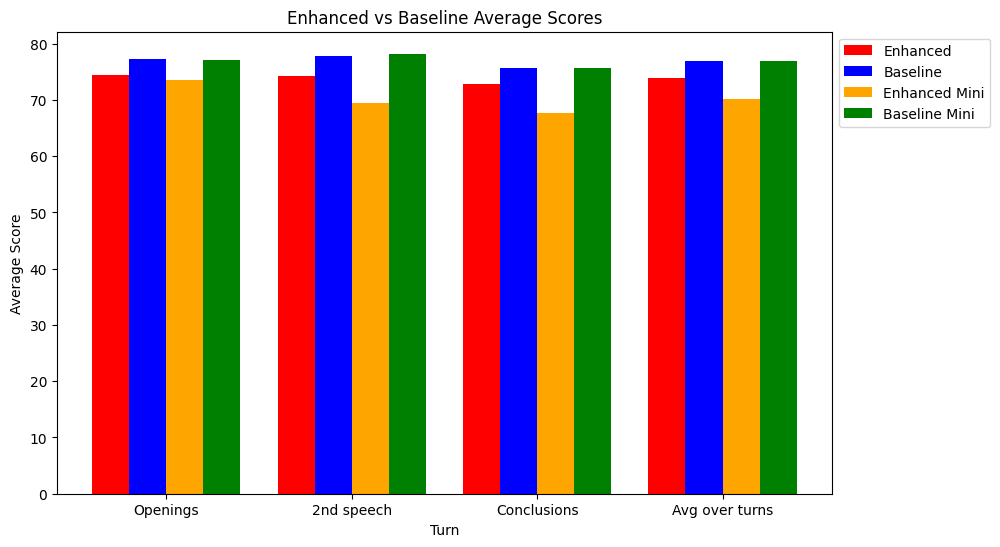

In [ ]:
# Plot
turns = ['Openings', '2nd speech', 'Conclusions', 'Avg over turns']
x = [0, 1, 2, 3]

# Adjust spacing - use 0.2 width and proper offsets for 4 bars
bar_width = 0.2
plt.bar([i - 0.3 for i in x], enhanced_avg_s, width=bar_width, color='red', label='Enhanced')
plt.bar([i - 0.1 for i in x], baseline_avg_s, width=bar_width, color='blue', label='Baseline')
plt.bar([i + 0.1 for i in x], enhanced_mini_avg_s, width=bar_width, color='orange', label='Enhanced Mini')
plt.bar([i + 0.3 for i in x], baseline_mini_avg_s, width=bar_width, color='green', label='Baseline Mini')

plt.xlabel('Turn')
plt.ylabel('Average Score')
plt.title('Enhanced vs Baseline Average Scores')
plt.xticks(x, turns)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
enhanced_avg_s, baseline_avg_s, enhanced_mini_avg_s, baseline_mini_avg_s

([74.4, 74.2, 72.9, 73.83333333333333],
 [77.2, 77.8, 75.6, 76.86666666666666],
 [73.5, 69.4, 67.7, 70.2],
 [77.0, 78.2, 75.6, 76.93333333333334])

In [ ]:
structured

,motion,num_turns,prop_model,opp_model,judge_model,prop_architecture,opp_architecture,winner,reason_for_decision,prop_total_score,...,prop_2_score,opp_2_score,prop_3_score,opp_3_score,prop_1_speech,opp_1_speech,prop_2_speech,opp_2_speech,prop_3_speech,opp_3_speech
0,This house would ban zoos,3,gpt-4o,gpt-4o,o3,enhanced,baseline,Opposition,1. Argumentation & Analysis ? Conservation: O...,216,...,72,80,70,77,"Ladies and gentlemen, esteemed judges, and val...","The call to ban zoos, as presented by the prop...","Ladies and gentlemen, esteemed judges, and hon...",The proposition's arguments illuminate a deepl...,"Ladies and gentlemen, esteemed panel, and wort...",In this debate on whether zoos should be banne...
1,This house would remove the right to privacy f...,3,gpt-4o,gpt-4o,o3,baseline,enhanced,Proposition,1. Clash on Accountability vs. Governance Spa...,225,...,74,73,75,74,This motion proposes that we remove the right ...,"Ladies and gentlemen, esteemed judges, and my ...",The proposition firmly stands by the motion to...,"**Introduction:**\n\nLadies and gentlemen, dis...",In this debate over whether we should remove t...,"Ladies and gentlemen, esteemed judges, and my ..."
2,This house would remove the right to privacy f...,3,gpt-4o-mini,gpt-4o-mini,o3,enhanced,baseline,Opposition,1. Argumentation & Analysis ? Proposition ad...,215,...,73,77,70,74,"**Ladies and gentlemen, esteemed judges, and h...",Opposing the motion to remove the right to pri...,"**Ladies and gentlemen, esteemed judges, and f...",The proposition asserts that removing the righ...,"**Introduction:**\nLadies and gentlemen, honor...","The debate surrounding the motion ""This house ..."
3,This house would remove the right to privacy f...,3,gpt-4o-mini,gpt-4o-mini,o3,baseline,enhanced,Proposition,1. Argumentation & Analysis ? Proposition of...,222,...,76,70,72,60,"The motion before us today is: ""This house wou...","Ladies and gentlemen, esteemed judges, and hon...","The debate surrounding the motion ""This house ...","Ladies and gentlemen, esteemed judges, and my ...",The debate surrounding the motion ?This house ...,"Ladies and gentlemen, honorable judges, esteem..."
4,This house would make voting mandatory,3,gpt-4o,gpt-4o,o3,enhanced,baseline,Opposition,1. Argumentation & Analysis ? Proposition con...,221,...,74,78,72,77,"Ladies and gentlemen, esteemed judges, and fel...","Mandatory voting policies, while seemingly adv...","**Introduction:**\n\nLadies and gentlemen, est...",The proposition's stance on mandatory voting i...,"Ladies and gentlemen, esteemed judges, and hon...",The debates we've engaged in today center arou...
5,This house would make voting mandatory,3,gpt-4o,gpt-4o,o3,baseline,enhanced,Proposition,1. Argumentation & Analysis ? Proposition est...,236,...,80,70,78,72,The motion before us is that this house would ...,"Ladies and gentlemen, esteemed judges, and hon...","The Opposition's arguments, while thoughtfully...","Ladies and gentlemen, esteemed judges, and fel...",The debate today centers around the motion of ...,"Ladies and gentlemen, esteemed judges, and fel..."
6,This house would make voting mandatory,3,gpt-4o-mini,gpt-4o-mini,o3,enhanced,baseline,Opposition,1. Argumentation & Analysis (45%) ? Propositi...,222,...,74,76,73,76,"**Introduction:**\n\nLadies and gentlemen, est...",The proposition for mandatory voting presents ...,"Ladies and gentlemen, honed minds of the oppos...",The proposition for mandatory voting rests on ...,"Ladies and gentlemen, esteemed judges, and my ...","Throughout this debate, the proposition has pu..."
7,This house would make voting mandatory,3,gpt-4o-mini,gpt-4o-mini,o3,baseline,enhanced,Proposition,1. Argumentation & Analysis ? Proposition adv...,235,...,80,71,77,70,"The motion before us is ""This house would make...","Ladies and gentlemen, esteemed judges, and my ...","The motion before us today is ""This house woul...","**Introduction:**\n\nLadies and gentlemen, est...","The motion before us is ""This house wo

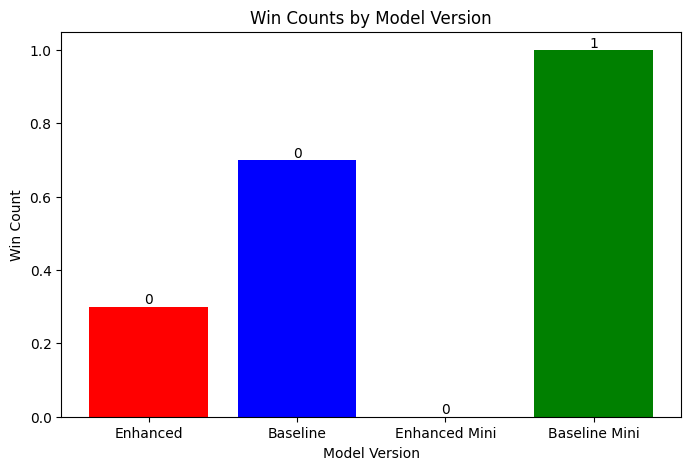

In [ ]:
# Your win count data (replace with your actual data)
categories = ['Enhanced', 'Baseline', 'Enhanced Mini', 'Baseline Mini']

num_reg = enhanced_win_count_s + baseline_win_count_s
num_mini = enhanced_mini_win_count_s + baseline_mini_win_count_s
win_rates= [enhanced_win_count_s/num_reg, baseline_win_count_s/num_reg,
              enhanced_mini_win_count_s/num_mini, baseline_mini_win_count_s/num_mini]

# Colors for each bar
colors = ['red', 'blue', 'orange', 'green']

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, win_rates, color=colors)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Model Version')
plt.ylabel('Win Count')
plt.title('Win Counts by Model Version')

plt.show()

In [ ]:
win_rates

[0.3, 0.7, 0.0, 1.0]